<a href="https://colab.research.google.com/github/VerlonRoelMBINGUI/AMMI_ML-Foundation_-supervised-learning/blob/main/Verlon_Roel_Mbingui_KNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://aims-senegal.org/wp-content/uploads/sites/2/2020/10/aims_senegal.jpg' /></a>

This tutorial is inspired by [Assignment 1](https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/assignment1.html) from the "Deep Learning for Computer Vision EECS 498-007 / 598-005" Course (University of Michigan).



# KNN:

**K** **N**earest **N**eighbors algorithm is a non-parametric supervised learning method that is used to solve classification and regression tasks.

---

The KNN algorithm output is calculated based on the k closest training examples.

---

In classification: the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its K nearest neighbors (K is a positive integer, typically small). If K = 1, then the object is simply assigned to the class of that single nearest neighbor.

---

In regression: the output is a continous value for the object. This value is the average of the values of k nearest neighbors.

---


# KNN Classifier:

<img src='https://miro.medium.com/max/1400/0*34SajbTO2C5Lvigs.png' />

In KNN a commonly used distance function for continuous variables is **Euclidean distance**. For discrete variables, such as for text classification, another metric can be used, such as the **Hamming distance**.



---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data Generation

In [ ]:
np.random.seed(0)
n = 300
X1 = np.random.normal((0,5), 3, (n//3,2))
Y1 = np.ones((n//3,1))
X2 = np.random.normal((5,0), 3, (n//3,2))
Y2 = 0 * np.ones((n//3,1))
X3 = np.random.normal((-2,0), 3, (n//3,2))
Y3 = 2 * np.ones((n//3,1))

X = np.vstack([X1,X2,X3])
Y = np.vstack([Y1,Y2,Y3]).astype(int)


# shuffle data
idx = np.random.permutation(X.shape[0])
X, Y = X[idx,:], Y[idx]

# train/test split
ratio = 0.8 
X_train, Y_train = X[:int (ratio*X.shape[0]), :], Y[:int (ratio*X.shape[0]), :]

X_test, Y_test = X[int (ratio*X.shape[0]):, :], Y[int (ratio*X.shape[0]):, :]

print (X_train.shape, X_test.shape , Y_train.shape, Y_test.shape)

(240, 2) (60, 2) (240, 1) (60, 1)


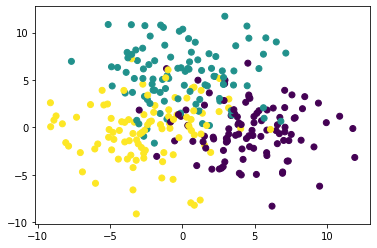

In [ ]:
# plot the data
plt.scatter(X[:,0], X[:,1], c = Y[:,0])
plt.show()

# Two Loops KNN Implementaion

In [ ]:
def KNN_two_loops(x_train, x_test):
  
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dist = np.zeros((num_train, num_test))
  ##############################################################################
  # TODO: Implement this function using a pair of nested loops over the        #
  # training data and the test data.                                           #
  ##############################################################################   
  for i in range(num_train):
    for j in range(num_test):
      dist[i,j] = np.sqrt(np.sum((x_train[i]-x_test[j])**2))
      # we can also use the code below
      #dist[i,j]=np.linalg.norm((x_train[i],x_test[j]))
      
  
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################

  
  return   dist

In [ ]:
KNN_two_loops(X_train, X_test)

array([[ 9.22499002,  9.43688888,  4.45988504, ...,  6.02873014,
         4.05519998, 12.32979812],
       [ 5.96568351, 17.25128968,  9.04490409, ...,  2.68911816,
        12.6815975 , 13.07981838],
       [ 3.54221856, 12.57900149,  5.44926651, ...,  8.09014269,
        11.2885241 ,  3.91356141],
       ...,
       [ 2.68086224, 12.17517788,  3.886988  , ...,  5.37043059,
         9.60627571,  6.59419792],
       [14.06002988,  9.77798144,  8.83992965, ..., 10.19855083,
         4.2708772 , 16.6601789 ],
       [ 4.59504603, 11.26644245,  4.5833262 , ...,  8.40784115,
        10.29062118,  3.6725146 ]])

##1-Loop Implementation

In [ ]:
def KNN_one_loop(x_train, x_test):
  ##YOUR CODE HERE 
  ## Hint : use broadcasting to compute the difference between each example in x-_train and the x_test array
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dist = np.zeros((num_train, num_test))

  for i in range(num_train):
    dist[i,:]= np.sqrt(np.sum((x_train[i]-x_test)**2, axis=1))
  return dist

In [ ]:
KNN_one_loop(X_train, X_test)

array([[ 9.22499002,  9.43688888,  4.45988504, ...,  6.02873014,
         4.05519998, 12.32979812],
       [ 5.96568351, 17.25128968,  9.04490409, ...,  2.68911816,
        12.6815975 , 13.07981838],
       [ 3.54221856, 12.57900149,  5.44926651, ...,  8.09014269,
        11.2885241 ,  3.91356141],
       ...,
       [ 2.68086224, 12.17517788,  3.886988  , ...,  5.37043059,
         9.60627571,  6.59419792],
       [14.06002988,  9.77798144,  8.83992965, ..., 10.19855083,
         4.2708772 , 16.6601789 ],
       [ 4.59504603, 11.26644245,  4.5833262 , ...,  8.40784115,
        10.29062118,  3.6725146 ]])

#KNN Vectorized Implementation(No Loop)

In [ ]:

def KNN(X_train, X_test):

    '''
    X_train: (n_tr_samples, n_features)
    X_test: (n_ts_samples, n_features)

    '''
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    dist = np.zeros((num_train, num_test))

    
  ##############################################################################
  # TODO: Implement this function without loop. #HINT: Try to formulate 

  # the Euclidean distance using two broadcast sums and a matrix multiply.
  ##############################################################################
    x = np.sum(X_train**2, axis =1)
    y = np.sum(X_test**2, axis =1)
    X_trainX_test = np.matmul(X_train,X_test.T)
    x = x.reshape(-1,1)
    dist = np.sqrt(x-2*X_trainX_test +y)
    
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
    return dist

    

In [ ]:
dist = KNN(X_train, X_test)
dist

array([[ 9.22499002,  9.43688888,  4.45988504, ...,  6.02873014,
         4.05519998, 12.32979812],
       [ 5.96568351, 17.25128968,  9.04490409, ...,  2.68911816,
        12.6815975 , 13.07981838],
       [ 3.54221856, 12.57900149,  5.44926651, ...,  8.09014269,
        11.2885241 ,  3.91356141],
       ...,
       [ 2.68086224, 12.17517788,  3.886988  , ...,  5.37043059,
         9.60627571,  6.59419792],
       [14.06002988,  9.77798144,  8.83992965, ..., 10.19855083,
         4.2708772 , 16.6601789 ],
       [ 4.59504603, 11.26644245,  4.5833262 , ...,  8.40784115,
        10.29062118,  3.6725146 ]])

##Test the difference in values

In [ ]:
np.random.seed(0)
x_train_rand = np.random.randn(100, 3*32*32)
x_test_rand = np.random.randn(100, 3*32*32)

dists_two = KNN_two_loops(x_train_rand, x_test_rand, )
dists_none = KNN(x_train_rand, x_test_rand,)
difference = np.sqrt(np.sum(np.power((dists_two - dists_none), 2)))
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different') 

Difference:  5.502005445409265e-13
Good! The distance matrices match


# Loops vs Vectorization: Speed Test

In [ ]:
%timeit  KNN(X_train, X_test)


96.5 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit  KNN_two_loops(X_train, X_test)

125 ms ± 42.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#Predict Labels

In [ ]:
def predict_labels(dists, Y_train, k=1):
  """
  Given distances between all pairs of training and test samples, predict a
  label for each test sample by taking a **majority vote** among its k nearest
  neighbors in the training set.


  Inputs:
  - dists: array of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  - y_train: array shape (num_train,) giving labels for all training
    samples. Each label is an integer in the range [0, num_classes - 1]
  - k: The number of nearest neighbors to use for classification.

  Returns:
  - y_pred: array of shape (num_test,) giving predicted labels
    for the test data, where y_pred[j] is the predicted label for the jth test
    example. Each label should be an integer in the range [0, num_classes - 1].
  """
  y_pred = np.zeros((dists.shape[1],1))
   
  for i in range(dists.shape[1]):
    indices = np.argsort(dists[:,i])[:k]
    label = Y_train[indices]
    label1 = np.hstack(label)
    
    y_pred[i]= np.bincount(label1).argmax()
    

  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  
  return y_pred   




###Test your predict label method

In [ ]:
dists = KNN_two_loops(X_train, X_test)
predict_labels(dists, Y_train, k=1).shape


(60, 1)

In [ ]:
dists = np.array([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train2 = np.array([0, 1, 0, 1, 2]).reshape(-1,1)
y_pred_expected2 =np.array([1, 0, 0]).reshape(-1,1)
y_pred2 = predict_labels(dists, y_train2, k=3)
correct = y_pred2.tolist() == y_pred_expected2.tolist()
print('Correct: ', correct)

Correct:  True


#Build complete KNN classifier 

In [ ]:

class KnnClassifier:
  def __init__(self, x_train, y_train):
    """
    Create a new K-Nearest Neighbor classifier with the specified training data.
    In the initializer we simply memorize the provided training data.

    Inputs:
    - x_train:  training data
    - y_train:  training labels
    """
    ###########################################################################
    # TODO: Implement the initializer for this class. It should perform no    #
    # computation and simply memorize the training data.                      #
    ###########################################################################
    self.x_train=x_train
    self.y_train=y_train

    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

  def predict(self, x_test, k=1):
    """
    Make predictions using the classifier.Use your predict label and KNN functions defined before

    Inputs:
    - x_test:  test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: array of shape (num_test,) giving predicted labels
      for the test samples.
    """
     
    ###########################################################################
    # TODO: Implement this method. You should use the functions you wrote     #
    # above for computing distances (use the no-loop variant) and to predict  #
    # output labels.
  
    ###########################################################################
    y_test_pred = np.zeros(x_test.shape[0])
    dists = KNN(self.x_train, x_test)
    y_test_pred=predict_labels(dists, self.y_train, k)
    return y_test_pred 
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
   

  def check_accuracy(self, x_test, y_test, k=1):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test:  test samples
    - y_test: test labels
    - k: The number of neighbors to use for prediction
   
    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    ############################################################################
    # TODO: Implement this method. 
    ###########################################################################
    ypred = self.predict(x_test,k)
    accuracy = np.mean(ypred == y_test)*100
    return accuracy


## Compute accuracy on the test data

In [ ]:
classifier = KnnClassifier(X_train, Y_train)
classifier.check_accuracy(X_test, Y_test, k=8)


81.66666666666667

In [ ]:
test_accuracy = [classifier.check_accuracy(X_test, Y_test, k=i) for i in range(1, 20)]
train_accuracy = [classifier.check_accuracy(X_train, Y_train, k=i) for i in range(1, 20)]


<ipython-input-174-4edaf39590d1>:22: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt(x-2*X_trainX_test +y)


In [ ]:
classifier.check_accuracy(X_train, Y_train, k=1)

<ipython-input-174-4edaf39590d1>:22: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt(x-2*X_trainX_test +y)


95.83333333333334

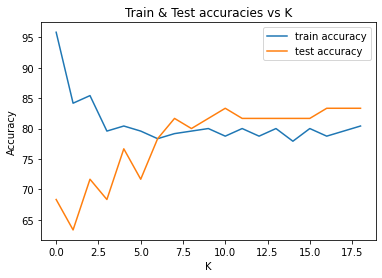

In [ ]:
plt.plot(train_accuracy, label="train accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Train & Test accuracies vs K")
plt.legend()
plt.show()

## What is the value of K that gives the best test accuracy?

In [ ]:
###########################################################################
    # TODO: write a code that returns the value of K which has the highest     #
    # test accuracy                     
    ###########################################################################
best_K = np.argmax(test_accuracy)+1
best_K
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

11

## KNN Advantages


## KNN Disadvantages

## How to select the value of k

# KNN demo


Try this website (http://vision.stanford.edu/teaching/cs231n-demos/knn/) for an interactive demo of the K-Nearest Neighbours Algorithm. 

# Excercise

Use the previous implementation of  the K-Nearest Neighbors (KNN) algorithm on the IRIS dataset. Divide the data into training and testing sets, using 80% of the data for training and 20% for testing. Experiment with various values of k (the number of neighbors) and plot the test accuracy for each value of K.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris()

In [ ]:
X,Y = iris_dataset.data, iris_dataset.target
X.shape, Y.shape

((150, 4), (150,))

In [ ]:
# Split the data into train and test 

In [ ]:
# Train your KNN Classifier

In [ ]:
# Evaluate on the test set. Try different values for K 

In [ ]:
# Plot the test accuracy